## Validation Methods
#### train test
#### k-fold cross validation
#### leave one out cross Validation

# LINEAR REGRESSION SKLEARN

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv("Cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [11]:
df.shape

(81, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HP,81.0,117.469136,57.113502,49.000000,84.000000,100.000000,140.000000,322.000000
MPG,81.0,34.422076,9.131445,12.101263,27.856252,35.152727,39.531633,53.700681
VOL,81.0,98.765432,22.301497,50.000000,89.000000,101.000000,113.000000,160.000000
SP,81.0,121.540272,14.181432,99.564907,113.829145,118.208698,126.404312,169.598513
WT,81.0,32.412577,7.492813,15.712859,29.591768,32.734518,37.392524,52.997752


In [14]:
df.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [16]:
# drop missing values
df = df.dropna()

In [18]:
# features and target
X = df.drop(columns = ['MPG','WT'])
y = df['MPG']

In [19]:
X

,HP,VOL,SP
0,49,89,104.185353
1,55,92,105.461264
2,55,92,105.461264
3,70,92,113.461264
4,53,92,104.461264
...,...,...,...
76,322,50,169.598513
77,238,115,150.576579
78,263,50,151.598513
79,295,119,167.944460


In [20]:
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [22]:
# train test split
# 20 % test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train,y_train

(     HP  VOL          SP
 61  120  116  117.668550
 55  130  124  126.404312
 40   95  113  116.392639
 9    80   94  115.645204
 64  150  121  128.128401
 ..  ...  ...         ...
 20   92   99  119.105055
 60  145  111  130.208698
 71  162  135  133.415985
 14   66   89  108.185353
 51  115  101  118.288996
 
 [64 rows x 3 columns],
 61    24.609132
 55    27.856252
 40    35.152727
 9     42.299078
 64    23.605158
         ...    
 20    38.411003
 60    27.354265
 71    23.203569
 14    45.734893
 51    29.629936
 Name: MPG, Length: 64, dtype: float64)

In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([33.70652954, 42.0190952 , 37.88421588, 35.94669724, 40.67080891,
       35.45410706, 40.48542819, 32.11825867, 40.60363019, 40.00483507,
       32.28959935, 34.24398818, 23.74162798, 36.76905519, 24.43091038,
       35.4525772 , 17.05808961])

In [28]:
pred_testdf = pd.DataFrame()
pred_testdf['y_test'] = y_test
pred_testdf['y_test_pred'] = y_pred
pred_testdf

,y_test,y_test_pred
30,39.431235,33.706530
0,53.700681,42.019095
22,38.310606,37.884216
31,39.431235,35.946697
18,42.789909,40.670809
28,43.469434,35.454107
10,44.652834,40.485428
70,19.678507,32.118259
4,50.504232,40.603630
12,39.354094,40.004835


In [30]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)

MSE 31.799220669391588
RMSE 5.63907977150453
MAE 4.08155830625987
R2 0.6766296213732192


####  One hot encoding -- x features
####  Label encoding -- Ordinal data

### Scaling - More Numeriacl values ex:Clustering  
#### Standardization - (-3,3) if Normally distribution
#### Min Max Scaling - (0,1) 

In [33]:
a = list([40,80,60,90,65])

In [37]:
mu = np.mean(a)
mu

67.0

In [38]:
sigma = np.std(a)
sigma

17.204650534085253

In [44]:
#z score
z = []
for x in a:
  z.append( (x - mu )/ sigma)
z

[-1.5693431230415602,
 0.7556096518348253,
 -0.4068667356033675,
 1.3368478455539217,
 -0.11624763874381928]

In [45]:
# min max
mini = 40
maxi = 90
minmax = []
for x in a:
    minmax.append((x - mini)/(maxi-mini))
minmax

[0.0, 0.8, 0.4, 1.0, 0.5]

## REGULARIZATION METHODS
#### feature selection
#### reducing noisy data - not contribute to predict y
### objective of Linear R - minimise MSE
#### regularization - minimise MSE +penalty term
## types
#### Lasso  beta -> 0
#### Ridge beta -> least value - shrink
#### Elastic net -> middle of Lasso & Ridge

In [ ]:
#multi collinearity well addressed by regularization

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [48]:
df = pd.read_csv('Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [49]:
df.shape

(81, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HP,81.0,117.469136,57.113502,49.000000,84.000000,100.000000,140.000000,322.000000
MPG,81.0,34.422076,9.131445,12.101263,27.856252,35.152727,39.531633,53.700681
VOL,81.0,98.765432,22.301497,50.000000,89.000000,101.000000,113.000000,160.000000
SP,81.0,121.540272,14.181432,99.564907,113.829145,118.208698,126.404312,169.598513
WT,81.0,32.412577,7.492813,15.712859,29.591768,32.734518,37.392524,52.997752


In [52]:
df.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [53]:
df = df.dropna() 
X = df.drop(columns = ['MPG'])
y = df['MPG']

In [ ]:
# train all on x and y  cols

In [58]:
model1 = LinearRegression()
model1.fit(X,y)

LinearRegression()

In [59]:
y_pred = model1.predict(X)
y_pred

array([43.44193477, 42.38879289, 42.27934147, 42.53835981, 42.17264802,
       43.02061916, 42.32536062, 48.07621852, 48.28120247, 40.79122814,
       41.52153227, 47.80956747, 39.95980269, 41.52757889, 41.76632332,
       41.6181448 , 41.15094046, 47.98605515, 41.30861046, 37.87127922,
       38.57706414, 37.35199705, 37.89770285, 39.5625144 , 39.93380662,
       46.73870908, 35.48165898, 38.78152504, 38.24861192, 36.00285298,
       34.84603989, 37.21630246, 37.13919796, 34.82541399, 37.22361389,
       37.53950097, 39.27144845, 38.24219888, 38.54286458, 35.9391722 ,
       34.2129755 , 35.36313259, 37.50473376, 38.07998482, 35.79651664,
       36.2613377 , 34.21826465, 35.59393404, 36.91805291, 33.31108154,
       33.21313413, 33.3023649 , 29.19864884, 27.52358579, 28.3207133 ,
       28.56722621, 35.81583602, 33.02108459, 35.37334971, 32.29909503,
       29.87685849, 28.76093817, 25.14188416, 26.47040896, 25.97651933,
       36.35652478, 26.0975912 , 23.6416178 , 24.39887199, 20.21

In [60]:
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)

MSE 18.897141152343103
RMSE 4.347084212704316
MAE 3.2679682854207996
R2 0.7705372737359844


In [66]:
## Model coefficients
model1.intercept_,model1.coef_

(30.677335852151685,
 array([-0.20544372, -0.33605084,  0.39562692,  0.40057409]))

### Ridge

In [ ]:
# higher penalty high shrinking -- tuning value 

In [63]:
model2 = Ridge()
model2.fit(X,y)

Ridge()

In [75]:
model_2 = Ridge(alpha = 2)
model_2.fit(X,y)

Ridge(alpha=2)

In [80]:
model_22 = Ridge(alpha = 10)
model_22.fit(X,y)
y_pred = model_22.predict(X)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)
model_22.intercept_,model_22.coef_

MSE 18.904229357023226
RMSE 4.34789941891751
MAE 3.2641097471109375
R2 0.7704512036390789


(30.64400865093136,
 array([-0.20500044, -0.24204108,  0.39367954,  0.1208378 ]))

In [64]:
y_pred = model2.predict(X)
y_pred

array([43.46537487, 42.36863135, 42.27623142, 42.50880562, 42.18842991,
       42.99305755, 42.31508123, 48.08712975, 48.26017913, 40.78548876,
       41.50756958, 47.82796893, 39.94143089, 41.51267419, 41.75310406,
       41.58913078, 41.16855543, 47.97696149, 41.30166193, 37.89211243,
       38.58850466, 37.36905827, 37.92922606, 39.54097486, 39.95662021,
       46.73833486, 35.51259022, 38.76111247, 38.22808413, 35.98064214,
       34.87659371, 37.21179587, 37.16723624, 34.80258979, 37.25230762,
       37.55495684, 39.27416335, 38.25745127, 38.51127608, 35.94157964,
       34.20070615, 35.35163568, 37.48062818, 38.10797218, 35.82260474,
       36.25325553, 34.21997785, 35.58926512, 36.92220804, 33.29203482,
       33.20934671, 33.28467616, 29.2289961 , 27.49802023, 28.31740067,
       28.58611475, 35.81418133, 33.04721667, 35.384674  , 32.3113594 ,
       29.85422598, 28.7810575 , 25.13189147, 26.45910874, 25.9584911 ,
       36.37496159, 26.06896035, 23.6614003 , 24.40351348, 20.19

In [76]:
y_pred = model_2.predict(X)
y_pred

array([43.48324135, 42.35342157, 42.27397007, 42.48588779, 42.20058251,
       42.97167923, 42.30737567, 48.09597746, 48.24477663, 40.78069366,
       41.49687771, 47.84148532, 39.9265914 , 41.50126699, 41.74314858,
       41.56700937, 41.18158931, 47.96959887, 41.29604298, 37.90747262,
       38.59669957, 37.38206248, 37.95261763, 39.5244598 , 39.97350357,
       46.7379893 , 35.53542739, 38.74511905, 38.2133181 , 35.96330078,
       34.89983824, 37.20853094, 37.18824059, 34.7848298 , 37.27429003,
       37.56667342, 39.27629282, 38.26910706, 38.48736223, 35.94287306,
       34.19139688, 35.34297461, 37.46234383, 38.12945278, 35.84258781,
       36.24714522, 34.22120025, 35.58577948, 36.92488142, 33.27792867,
       33.20682802, 33.27160121, 29.25219587, 27.47777135, 28.31446564,
       28.60030139, 35.81367708, 33.06741801, 35.39387212, 32.32095461,
       29.83681736, 28.79698468, 25.12453673, 26.45083151, 25.94504654,
       36.38965272, 26.0473463 , 23.67643554, 24.40708627, 20.18

In [67]:
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)

MSE 18.897481908037015
RMSE 4.347123406120076
MAE 3.2668720140582677
R2 0.7705331360344196


In [77]:
#  for alpha 2
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)

MSE 18.898198700004347
RMSE 4.347205849738927
MAE 3.2660860542932215
R2 0.7705244322290311


In [68]:
## Model coefficients
model2.intercept_,model2.coef_

(30.609417214873282,
 array([-0.20550679, -0.31509536,  0.39586042,  0.33816841]))

In [78]:
## Model coefficients
model_2.intercept_,model_2.coef_

(30.56978905114859,
 array([-0.2055227 , -0.29917902,  0.3959058 ,  0.29077932]))

## Lasso

In [69]:
model3 = Lasso()
model3.fit(X,y)

Lasso()

In [70]:
y_pred = model3.predict(X)
y_pred

array([43.6371605 , 42.33851899, 42.33851899, 41.9003754 , 42.41532932,
       42.41685038, 42.33851899, 48.61066292, 48.61066292, 40.34440382,
       41.33609769, 47.45850798, 39.02275022, 41.33609769, 41.74286773,
       41.33609769, 40.93768911, 47.45850798, 40.93768911, 37.58332397,
       38.1951469 , 37.50917331, 37.59768088, 39.27201258, 39.66358076,
       46.63090467, 35.09629711, 38.1951469 , 38.87056189, 35.42988634,
       35.0924101 , 37.33046826, 37.05194082, 34.29740768, 37.58361764,
       37.61651226, 39.33809546, 38.39394682, 38.39394682, 35.45804896,
       34.15244217, 35.35755042, 37.36099688, 38.45640021, 36.12299404,
       36.23269896, 34.16679911, 35.62087603, 36.4909989 , 33.51916433,
       33.51916433, 33.51916433, 29.55952294, 26.61205273, 27.93189156,
       28.56964382, 36.48795679, 33.51916433, 35.99001951, 32.65056251,
       29.54195511, 29.50335874, 25.3252773 , 26.70254388, 26.11107334,
       37.06856726, 26.05043469, 23.8123765 , 24.5010098 , 19.46

In [71]:
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
print("MSE",mse)
print('RMSE',rmse)
print("MAE",mae)
print("R2",r2)

MSE 19.070748029765866
RMSE 4.367006758612341
MAE 3.3256128677895864
R2 0.7684292137352434


In [72]:
## Model coefficients
model3.intercept_,model3.coef_

(41.11655857360362,
 array([-0.17633905, -0.19752995,  0.27586777, -0.        ]))

### Elastic Net

In [84]:
model4 = ElasticNet()
model4.fit(X,y)
y_pred = model4.predict(X)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y,y_pred)
r2 = r2_score(y,y_pred)
model4.intercept_,model4.coef_

(37.17142852617545,
 array([-0.18708431, -0.19907938,  0.31997164, -0.        ]))

In [85]:
print("Linear:",model1.intercept_,model1.coef_)
print("Ridge:",model2.intercept_,model2.coef_)
print("Ridge 2 :",model_2.intercept_,model_2.coef_)
print("Ridge 10:",model_22.intercept_,model_22.coef_)
print("Lasso:",model3.intercept_,model3.coef_)
print("Elastic net:",model4.intercept_,model4.coef_)

Linear: 30.677335852151685 [-0.20544372 -0.33605084  0.39562692  0.40057409]
Ridge: 30.609417214873282 [-0.20550679 -0.31509536  0.39586042  0.33816841]
Ridge 2 : 30.56978905114859 [-0.2055227  -0.29917902  0.3959058   0.29077932]
Ridge 10: 30.64400865093136 [-0.20500044 -0.24204108  0.39367954  0.1208378 ]
Lasso: 41.11655857360362 [-0.17633905 -0.19752995  0.27586777 -0.        ]
Elastic net: 37.17142852617545 [-0.18708431 -0.19907938  0.31997164 -0.        ]


# LOGISTIC REGRESSION

In [8]:
# clssification binary or multi
# predicts probability = 1 / (1+e^-z)  z = beta 0 + beta 1 *(bmi)
# ln( p /1-p) = z   logit model

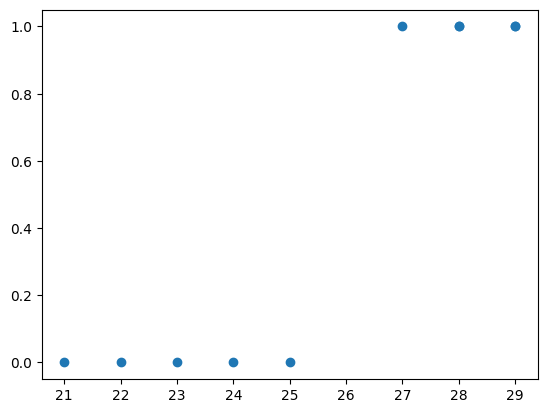

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
a = pd.DataFrame({'bmi':[23,29,25,28,27,28,24,22,29,21],'class':[0,1,0,1,1,1,0,0,1,0]})
plt.scatter(x=a['bmi'],y=a['class'])

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [12]:
df = pd.read_csv('dia_clean.csv')
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [13]:
df.shape

(733, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  733 non-null    int64  
 1   preg        733 non-null    int64  
 2   plas        733 non-null    float64
 3   pres        733 non-null    float64
 4   skin        733 non-null    float64
 5   mass        733 non-null    float64
 6   pedi        733 non-null    float64
 7   age         733 non-null    int64  
 8   class       733 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 51.7 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,733.0,383.461119,221.923337,0.000,190.000,382.00,575.000,767.00
preg,733.0,3.858117,3.372025,0.000,1.000,3.00,6.000,17.00
plas,733.0,121.778990,30.600372,44.000,100.000,117.00,141.000,199.00
pres,733.0,72.358799,12.346248,24.000,64.000,72.00,80.000,122.00
skin,733.0,29.113233,8.998907,7.000,24.000,29.00,33.000,99.00
mass,733.0,32.475034,6.873016,18.200,27.500,32.40,36.600,67.10
pedi,733.0,0.476502,0.334200,0.078,0.245,0.38,0.629,2.42
age,733.0,33.287858,11.749216,21.000,24.000,29.00,41.000,81.00
class,733.0,0.343793,0.475297,0.000,0.000,0.00,1.000,1.00


In [18]:
df.isnull().sum()

Unnamed: 0    0
preg          0
plas          0
pres          0
skin          0
mass          0
pedi          0
age           0
class         0
dtype: int64

In [26]:
df = df.loc[:, df.columns != 'Unnamed: 0']
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


In [27]:
df['class'].value_counts()

class
0    481
1    252
Name: count, dtype: int64

In [32]:
# features target
X = df.drop(columns = ['class'])
y =df['class']

#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)
# stratifyto  proportioinate 1 and 0
X_train

,preg,plas,pres,skin,mass,pedi,age
317,8,118.0,72.0,19.0,23.1,1.476,46
229,9,164.0,84.0,21.0,30.8,0.831,32
35,2,90.0,68.0,42.0,38.2,0.503,27
361,1,87.0,60.0,37.0,37.2,0.509,22
362,4,156.0,75.0,29.0,48.3,0.238,32
...,...,...,...,...,...,...,...
676,5,126.0,78.0,27.0,29.6,0.439,40
99,1,96.0,122.0,29.0,22.4,0.207,27
606,5,104.0,74.0,29.0,28.8,0.153,48
602,2,111.0,60.0,29.0,26.2,0.343,23


In [33]:
y_train

317    0
229    1
35     1
361    0
362    1
      ..
676    0
99     0
606    0
602    0
540    0
Name: class, Length: 586, dtype: int64

In [31]:
y_train.value_counts()

class
0    385
1    201
Name: count, dtype: int64

In [ ]:
#max_iter 

In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [40]:
pred_testdf = pd.DataFrame()
pred_testdf['y_test'] = y_test
pred_testdf['y_test_pred'] = y_pred
pred_testdf

,y_test,y_test_pred
62,0,0
665,0,0
657,1,1
577,1,1
425,1,0
...,...,...
478,0,0
385,0,0
185,1,1
375,1,1


In [ ]:
# precision = TP / TP+'FP'
# recall = TP / TP+'FN'
# accuracy = TP+TN / All - 

In [45]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy: 0.7551020408163265
Precision: 0.7027027027027027
Recall: 0.5098039215686274
Confusion matrix:
 [[85 11]
 [25 26]]
F1 score: 0.5909090909090909


In [47]:
print("Clssification Report\n",classification_report(y_test,y_pred))

Clssification Report
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        96
           1       0.70      0.51      0.59        51

    accuracy                           0.76       147
   macro avg       0.74      0.70      0.71       147
weighted avg       0.75      0.76      0.74       147



### SMOTE

In [ ]:
#class imbalance

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res,y_train_res = smote.fit_resample(X_train,y_train)

#logistic
model1 = LogisticRegression(max_iter = 1000)
model1.fit(X_train_res,y_train_res)
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [52]:
y_train_res.value_counts()

class
0    385
1    385
Name: count, dtype: int64

In [49]:
pred_testdf = pd.DataFrame()
pred_testdf['y_test'] = y_test
pred_testdf['y_test_pred'] = y_pred
pred_testdf

,y_test,y_test_pred
62,0,1
665,0,1
657,1,1
577,1,1
425,1,0
...,...,...
478,0,0
385,0,0
185,1,1
375,1,1


In [50]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy: 0.7210884353741497
Precision: 0.5892857142857143
Recall: 0.6470588235294118
Confusion matrix:
 [[73 23]
 [18 33]]
F1 score: 0.616822429906542


In [51]:
print("Clssification Report\n",classification_report(y_test,y_pred))

Clssification Report
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        96
           1       0.59      0.65      0.62        51

    accuracy                           0.72       147
   macro avg       0.70      0.70      0.70       147
weighted avg       0.73      0.72      0.72       147



## ROC

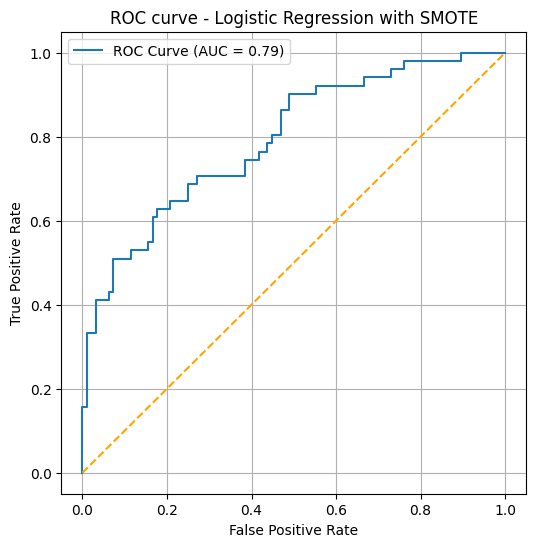

In [58]:
# receiver operating characteristic curve
import matplotlib.pyplot as plt
y_pred_proba = model1.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve , roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],linestyle = "--",color = 'orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Logistic Regression with SMOTE")
plt.legend()
plt.grid()
plt.show()

## CANCER DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('breast_cancer.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [66]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [67]:
df.corr(numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [7]:
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [8]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
labelen = LabelEncoder()
df['diagnosis']= labelen.fit_transform(y)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [14]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify=y)
# stratifyto  proportioinate 1 and 0
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [15]:
y_train

10     1
170    0
407    0
430    1
27     1
      ..
37     0
415    0
458    0
476    0
335    1
Name: diagnosis, Length: 455, dtype: int64

In [16]:
y_train.value_counts()

diagnosis
0    285
1    170
Name: count, dtype: int64

#### Label Encoding test and train of y replacing values

In [90]:
# y_test.replace({'B':0,'M':1},inplace=True)
# y_train.replace({'B':0,'M':1},inplace=True)
# y_train.value_counts()

/tmp/ipykernel_47172/2999371022.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'B':0,'M':1},inplace=True)
/tmp/ipykernel_47172/2999371022.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({'B':0,'M':1},inplace=True)


diagnosis
0    285
1    170
Name: count, dtype: int64

In [17]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

/home/rgukt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [19]:
pred_testdf = pd.DataFrame()
pred_testdf['y_test'] = y_test
pred_testdf['y_test_pred'] = y_pred
pred_testdf

,y_test,y_test_pred
120,0,0
250,1,1
375,0,0
99,1,1
455,0,1
...,...,...
381,0,0
534,0,0
448,0,0
205,1,1


In [20]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

Accuracy: 0.9385964912280702
Precision: 0.972972972972973
Recall: 0.8571428571428571
Confusion matrix:
 [[71  1]
 [ 6 36]]
F1 score: 0.9113924050632911


In [21]:
print("Clssification Report\n",classification_report(y_test,y_pred))

Clssification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res,y_train_res = smote.fit_resample(X_train,y_train)

#logistic
model1 = LogisticRegression(max_iter = 1000)
model1.fit(X_train_res,y_train_res)
y_pred = model1.predict(X_test)
y_pred

/home/rgukt/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1])

In [23]:
y_train_res.value_counts()

diagnosis
1    285
0    285
Name: count, dtype: int64

In [24]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))
print("Clssification Report\n",classification_report(y_test,y_pred))

Accuracy: 0.956140350877193
Precision: 0.9512195121951219
Recall: 0.9285714285714286
Confusion matrix:
 [[70  2]
 [ 3 39]]
F1 score: 0.9397590361445783
Clssification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



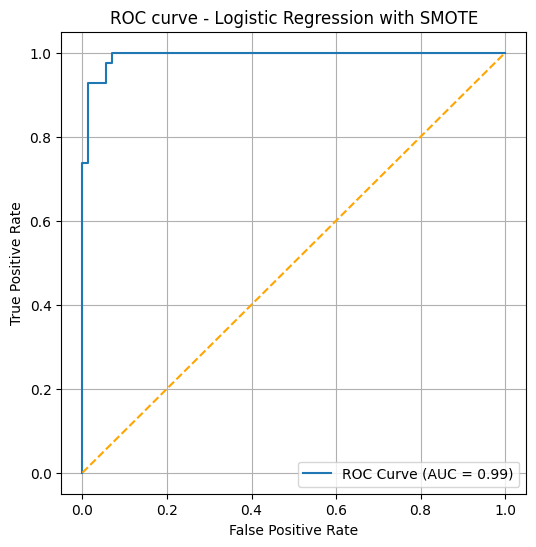

In [99]:
import matplotlib.pyplot as plt
y_pred_proba = model1.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve , roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],linestyle = "--",color = 'orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve - Logistic Regression with SMOTE")
plt.legend()
plt.grid()
plt.show()